In [2]:
import pandas as pd

# Load test dataset
train_data = pd.read_csv("train.csv")

train_data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


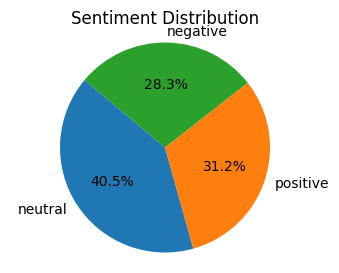

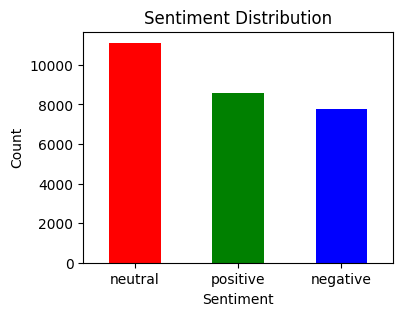

In [4]:
import matplotlib.pyplot as plt

# Calculate sentiment distribution
sentiment_distribution = train_data['sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 3))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

# Plot bar graph distribution
plt.figure(figsize=(4, 3))
sentiment_distribution.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [5]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function for data preprocessing
def preprocess_text(text):
    # Check if text is NaN or None
    if pd.isna(text):
        return ""
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters and URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'text' column of the test dataset
train_data['preprocessed_text'] = train_data['text'].apply(preprocess_text)

# Display the preprocessed data
train_data

,textID,text,selected_text,sentiment,preprocessed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,bos bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son put release already bought
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lost job ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,wondered rake client made clear net force devs...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good enjoy break probably need hectic week...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth


## NMF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(train_data['preprocessed_text'])

# Apply NMF for topic modeling
num_topics = 3  # Number of topics/categories
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
nmf_features = vectorizer.get_feature_names_out()

# Extract topic weights from NMF matrix
topic_weights = nmf_matrix

# Assign categories based on topic weights
train_data['topic_category'] = topic_weights.argmax(axis=1)  # Assign based on the highest topic weight index

train_data


,textID,text,selected_text,sentiment,preprocessed_text,sentiment_score,predicted_sentiment,topic_category
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,responded going,-1.000000,negative,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego,-0.999998,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,bos bullying,0.000000,neutral,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone,-0.936255,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son put release already bought,-0.833283,negative,1
...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lost job ...,-0.989876,negative,1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,wondered rake client made clear net force devs...,-1.000000,negative,1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good enjoy break probably need hectic week...,0.735823,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth,-0.619645,negative,1


In [5]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate accuracy from confusion matrix
accuracy_nmf = accuracy_score(train_data['sentiment'], train_data['predicted_sentiment'])

# Print accuracy
print("\nAccuracy for Topic Modeling-Based Sentiment Analysis:", accuracy_nmf)

# Classification report for topic modeling-based sentiment analysis
classification_report_nmf = classification_report(train_data['sentiment'], train_data['predicted_sentiment'])

# Print the classification report
print("Classification Report for Topic Modeling-Based Sentiment Analysis:")
print(classification_report_nmf)


Accuracy for Topic Modeling-Based Sentiment Analysis: 0.2849462365591398
Classification Report for Topic Modeling-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.17      0.06      0.09      1001
     neutral       0.51      0.06      0.11      1430
    positive       0.29      0.78      0.42      1103

    accuracy                           0.28      3534
   macro avg       0.32      0.30      0.21      3534
weighted avg       0.35      0.28      0.20      3534



## LogisticRegression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(test_data['preprocessed_text'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, test_data['sentiment'], test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logreg_model.predict(X_test)

In [7]:
# Calculate accuracy from confusion matrix
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy
print("\nAccuracy for Logistic Regression-Based Sentiment Analysis:", accuracy_lr)

# Classification report for logistic regression-based sentiment analysis
classification_report_logreg = classification_report(y_test, y_pred_lr)

# Print the classification report
print("Classification Report for Logistic Regression-Based Sentiment Analysis:")
print(classification_report_logreg)


Accuracy for Logistic Regression-Based Sentiment Analysis: 0.6492220650636492
Classification Report for Logistic Regression-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.70      0.49      0.57       207
     neutral       0.58      0.77      0.66       286
    positive       0.76      0.64      0.70       214

    accuracy                           0.65       707
   macro avg       0.68      0.63      0.64       707
weighted avg       0.67      0.65      0.65       707



## MultinomialNB

In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

In [9]:
# Calculate accuracy from confusion matrix
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy
print("\nAccuracy for Naive Bayes-Based Sentiment Analysis:", accuracy_nb)

# Classification report for Naive Bayes-based sentiment analysis
classification_report_nb = classification_report(y_test, y_pred_nb)

# Print the classification report
print("Classification Report for Naive Bayes-Based Sentiment Analysis:")
print(classification_report_nb)


Accuracy for Naive Bayes-Based Sentiment Analysis: 0.6138613861386139
Classification Report for Naive Bayes-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.69      0.44      0.54       207
     neutral       0.55      0.75      0.64       286
    positive       0.69      0.59      0.64       214

    accuracy                           0.61       707
   macro avg       0.64      0.60      0.61       707
weighted avg       0.63      0.61      0.61       707



## SVC

In [10]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [11]:
# Calculate accuracy from confusion matrix
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracy
print("\nAccuracy for SVM-Based Sentiment Analysis:", accuracy_svm)

# Classification report for SVM-based sentiment analysis
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print the classification report
print("Classification Report for SVM-Based Sentiment Analysis:")
print(classification_report_svm)


Accuracy for SVM-Based Sentiment Analysis: 0.6534653465346535
Classification Report for SVM-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.76      0.49      0.60       207
     neutral       0.58      0.80      0.67       286
    positive       0.75      0.62      0.68       214

    accuracy                           0.65       707
   macro avg       0.69      0.64      0.65       707
weighted avg       0.68      0.65      0.65       707



## RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [13]:
# Calculate accuracy from confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("\nAccuracy for Random Forest-Based Sentiment Analysis:", accuracy_rf)

# Classification report for Random Forest-based sentiment analysis
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the classification report
print("Classification Report for Random Forest-Based Sentiment Analysis:")
print(classification_report_rf)


Accuracy for Random Forest-Based Sentiment Analysis: 0.6336633663366337
Classification Report for Random Forest-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.64      0.49      0.55       207
     neutral       0.60      0.71      0.65       286
    positive       0.68      0.67      0.68       214

    accuracy                           0.63       707
   macro avg       0.64      0.62      0.63       707
weighted avg       0.64      0.63      0.63       707



## GradientBoostingClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)

In [15]:
# Calculate accuracy from confusion matrix
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

# Print accuracy
print("\nAccuracy for GBM-Based Sentiment Analysis:", accuracy_gbm)

# Classification report for GBM-based sentiment analysis
classification_report_gbm = classification_report(y_test, y_pred_gbm)

# Print the classification report
print("Classification Report for GBM-Based Sentiment Analysis:")
print(classification_report_gbm)


Accuracy for GBM-Based Sentiment Analysis: 0.6308345120226309
Classification Report for GBM-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.74      0.38      0.50       207
     neutral       0.55      0.84      0.67       286
    positive       0.76      0.60      0.67       214

    accuracy                           0.63       707
   macro avg       0.68      0.61      0.61       707
weighted avg       0.67      0.63      0.62       707



## VotingClassifier

In [16]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create the ensemble model using voting
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('nb', nb_model),
    ('svm', svm_model),
    ('rf', rf_model),
    ('gbm', gbm_model)
], voting='hard')  # 'hard' voting takes the majority of votes

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble_hard = ensemble_model.predict(X_test)

# Calculate accuracy from confusion matrix
accuracy_ensemble_hard = accuracy_score(y_test, y_pred_ensemble_hard)

# Print accuracy
print("\nAccuracy for Hard Voting Ensemble-Based Sentiment Analysis:", accuracy_ensemble_hard)

# Classification report for ensemble-based sentiment analysis
classification_report_ensemble_hard = classification_report(y_test, y_pred_ensemble_hard)

# Print the classification report
print("Classification Report for Hard Voting Ensemble-Based Sentiment Analysis:")
print(classification_report_ensemble_hard)


Accuracy for Hard Voting Ensemble-Based Sentiment Analysis: 0.6534653465346535
Classification Report for Hard Voting Ensemble-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.74      0.47      0.58       207
     neutral       0.58      0.80      0.67       286
    positive       0.75      0.64      0.69       214

    accuracy                           0.65       707
   macro avg       0.69      0.64      0.65       707
weighted avg       0.68      0.65      0.65       707



In [17]:
# Define the individual models
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear', probability=True)  # Enable probability estimation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create the ensemble model using soft voting
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('nb', nb_model),
    ('svm', svm_model),
    ('rf', rf_model),
    ('gbm', gbm_model)
], voting='soft')  # 'soft' voting takes probability estimates into account

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble_soft = ensemble_model.predict(X_test)

# Calculate accuracy from confusion matrix
accuracy_ensemble_soft = accuracy_score(y_test, y_pred_ensemble_soft)

# Print accuracy
print("\nAccuracy for Soft Voting Ensemble-Based Sentiment Analysis:", accuracy_ensemble_soft)

# Classification report for ensemble-based sentiment analysis
classification_report_ensemble_soft = classification_report(y_test, y_pred_ensemble_soft)

# Print the classification report
print("Classification Report for Soft Voting Ensemble-Based Sentiment Analysis:")
print(classification_report_ensemble_soft)


Accuracy for Soft Voting Ensemble-Based Sentiment Analysis: 0.6534653465346535
Classification Report for Soft Voting Ensemble-Based Sentiment Analysis:
              precision    recall  f1-score   support

    negative       0.74      0.46      0.57       207
     neutral       0.58      0.78      0.67       286
    positive       0.73      0.67      0.70       214

    accuracy                           0.65       707
   macro avg       0.69      0.64      0.65       707
weighted avg       0.68      0.65      0.65       707

